# Анализ пингвинов
## 1. Определение длины плавника по массе тела

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/kaggle/input/penguins/penguins.csv')
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   вид             333 non-null    int64  
 1   остров          333 non-null    int64  
 2   длина клюва     333 non-null    float64
 3   ширина клюва    333 non-null    float64
 4   длина плавника  333 non-null    float64
 5   масса тела      333 non-null    float64
 6   пол             333 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 18.3 KB


In [3]:
X = data[['масса тела']]
y = data['длина плавника']
X.head()

,масса тела
0,3750.0
1,3800.0
2,3250.0
3,3450.0
4,3650.0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

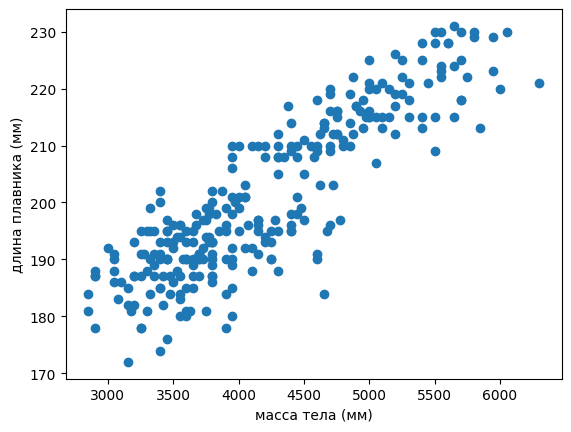

In [5]:
plt.scatter(X_train, y_train)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [7]:
lr.coef_, lr.intercept_

(array([0.01557709]), 135.42809790356375)

In [8]:
def f_line(x):
    return lr.coef_*x + lr.intercept_

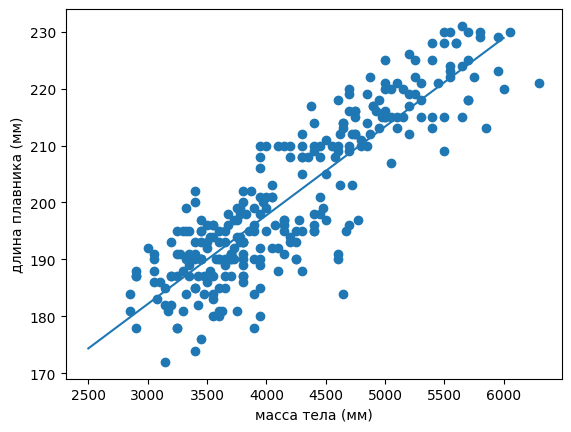

In [9]:
plt.scatter(X_train, y_train)

x_line = [2500, 6000]
y_line = f_line(x_line)

plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

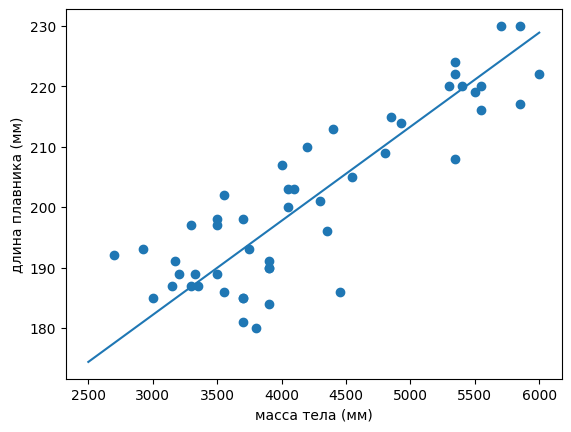

In [10]:
plt.scatter(X_test, y_test)

y_line = f_line(x_line)

plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

In [11]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [12]:
np.array(y_test)

array([220., 207., 190., 208., 189., 187., 230., 193., 202., 200., 220.,
       201., 203., 191., 189., 190., 217., 198., 197., 181., 224., 187.,
       205., 222., 222., 220., 191., 197., 184., 193., 185., 203., 209.,
       230., 187., 185., 189., 198., 192., 186., 216., 186., 213., 219.,
       180., 196., 214., 210., 215., 185.])

In [13]:
np.array(y_test_predicted)

array([217.98665609, 197.73644371, 196.17873506, 218.76551041,
       185.27477454, 186.83248319, 224.21749067, 193.84217209,
       190.7267548 , 198.51529803, 221.8809277 , 202.40956964,
       198.51529803, 196.17873506, 187.22191035, 196.17873506,
       226.55405364, 193.06331777, 189.94790048, 193.06331777,
       218.76551041, 187.61133751, 206.30384125, 228.89061661,
       218.76551041, 219.54436474, 184.88534738, 186.83248319,
       196.17873506, 180.99107577, 193.06331777, 199.29415235,
       210.19811287, 226.55405364, 184.49592022, 182.15935725,
       189.94790048, 189.94790048, 177.48623132, 190.7267548 ,
       221.8809277 , 204.74613261, 203.96727829, 221.10207338,
       194.62102642, 203.18842396, 212.14524867, 200.851861  ,
       210.97696719, 193.06331777])

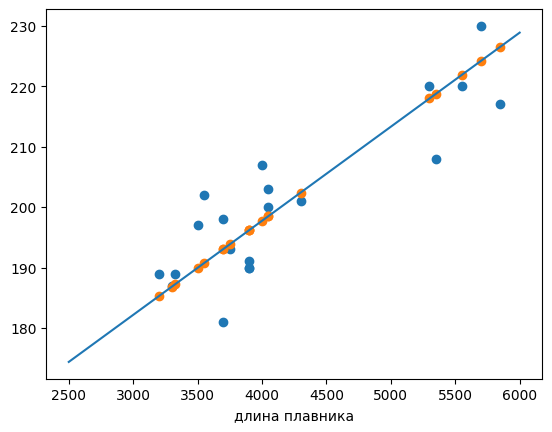

In [14]:
items_count = 20

plt.scatter(X_test[:items_count], y_test[:items_count])
plt.scatter(X_test[:items_count], y_test_predicted[:items_count])

y_line = f_line(x_line)

plt.plot(x_line, y_line)
plt.xlabel('масса тела (мм)')
plt.xlabel('длина плавника')

plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(5.487207602122379, 5.897453693089483)

In [16]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(45.546250587403726, 53.15654757588817)

## 2. Предсказание длины плавника по массе тела и длине клюва

In [17]:
X = data[['масса тела', 'длина клюва']]
y = data['длина плавника']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

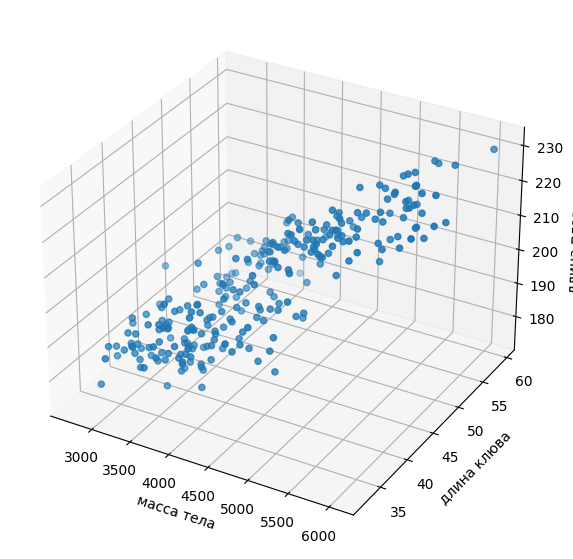

In [18]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_points = X_train['масса тела']
y_points = X_train['длина клюва']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

ax.set_xlabel('масса тела')
ax.set_ylabel('длина клюва')
ax.set_zlabel('длина плавника')

plt.show()

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_train_predicted = lr.predict(X_train)
y_train_predicted

array([221.80081847, 204.42567909, 209.47722103, 203.58318268,
       183.03400763, 193.27103491, 186.40068318, 219.30605079,
       225.65081202, 195.79534049, 189.32325602, 213.20956873,
       193.28733247, 198.52845708, 189.13379978, 210.35243898,
       195.38383289, 210.78992153, 197.89158804, 202.1235513 ,
       205.40199247, 202.88112341, 204.42886274, 192.57559581,
       214.53856679, 225.21969678, 203.73011355, 218.42115545,
       197.6303214 , 198.37490604, 221.95105943, 208.88618743,
       218.46037073, 181.70500957, 190.93949566, 200.91207266,
       186.80226053, 194.48900729, 204.41905892, 199.62891005,
       193.27765508, 189.68561809, 196.3471588 , 183.20054615,
       221.8237362 , 199.72032809, 193.98302443, 186.09370753,
       194.54452013, 228.15856718, 214.67251019, 201.66315103,
       204.13831107, 193.28733247, 192.8205649 , 191.53714942,
       224.53724515, 188.48725335, 200.846756  , 213.14106842,
       178.08037746, 192.96736934, 191.03753387, 196.14

In [21]:
lr.coef_, lr.intercept_

(array([0.01293093, 0.55512839]), 122.2059347439869)

In [22]:
def f_plane(x1, x2):
    return lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_

In [23]:
X_train['длина клюва'].min(), X_train['длина клюва'].max()

(32.1, 59.6)

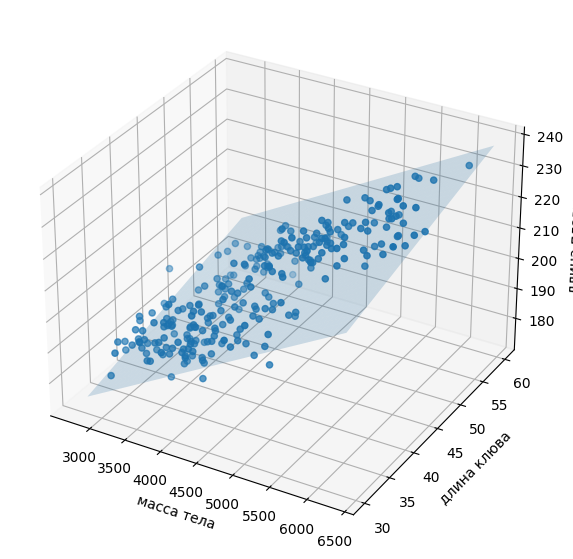

In [24]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

x_points = X_train['масса тела']
y_points = X_train['длина клюва']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

x, y = np.meshgrid(range(2800, 6350), range(30, 61))
z = np.array([f_plane(point_x, point_y) for point_x, point_y in zip(x, y)])
ax.plot_surface(x, y, z, alpha=0.2)

ax.set_xlabel('масса тела')
ax.set_ylabel('длина клюва')
ax.set_zlabel('длина плавника')

plt.show()

## 3. Предсказание массы тела по всем признакам

In [25]:
X = data.drop(columns=['масса тела'])
y = data['масса тела']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

In [29]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(258.3509747494858, 303.39004043687123)

In [30]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(101288.92890874363, 132884.37055147154)

## Сравнение линейной регрессиии и KNN

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [33]:
# MAE, MSE на train для KNN
mean_absolute_error(y_train_predicted_knn, y_train), mean_squared_error(y_train_predicted_knn, y_train)

(212.75618374558303, 75145.05300353357)

In [34]:
# MAE, MSE на train для LR
mean_absolute_error(y_train_predicted, y_train), mean_squared_error(y_train_predicted, y_train)

(258.3509747494858, 101288.92890874363)

In [35]:
# MAE, MSE на test для KNN
mean_absolute_error(y_test_predicted_knn, y_test), mean_squared_error(y_test_predicted_knn, y_test)

(307.7, 136371.5)

In [36]:
# MAE, MSE на test для LR
mean_absolute_error(y_test_predicted, y_test), mean_squared_error(y_test_predicted, y_test)

(303.39004043687123, 132884.37055147154)